In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
data = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [6]:
single_test_image = test_images[3]

# Save the image to your PC
plt.imsave('test_image_3.png', single_test_image, cmap='gray')

print("Image saved successfully!")

Image saved successfully!


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
train_images[0].shape

(28, 28)

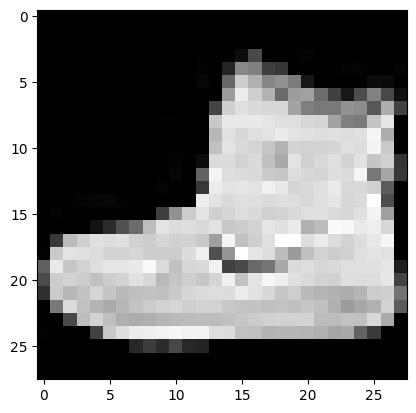

In [9]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [10]:
train_labels[0]

9

Class names corresponding to each nunber from 0 to 9: T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot

In [11]:
train_images, test_images = train_images/255, test_images/255

In [12]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [13]:
train_images.shape

(60000, 28, 28, 1)

In [14]:
test_images.shape

(10000, 28, 28, 1)

Building the CNN

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9286 - loss: 0.1937 - val_accuracy: 0.8954 - val_loss: 0.3035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9362 - loss: 0.1750 - val_accuracy: 0.8945 - val_loss: 0.3137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9417 - loss: 0.1585 - val_accuracy: 0.8924 - val_loss: 0.3278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9468 - loss: 0.1435 - val_accuracy: 0.8981 - val_loss: 0.3157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9508 - loss: 0.1312 - val_accuracy: 0.8950 - val_loss: 0.3520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9544 - loss: 0.1209 - val_accuracy: 0.8950 - val_loss: 0.3576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9596 - loss: 0.1086 - val_accuracy: 0.8982 - val_loss: 0.3742
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9618 - loss: 0.1

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8987 - loss: 0.4416


In [25]:
test_loss

0.4415624141693115

In [26]:
test_acc

0.8986999988555908

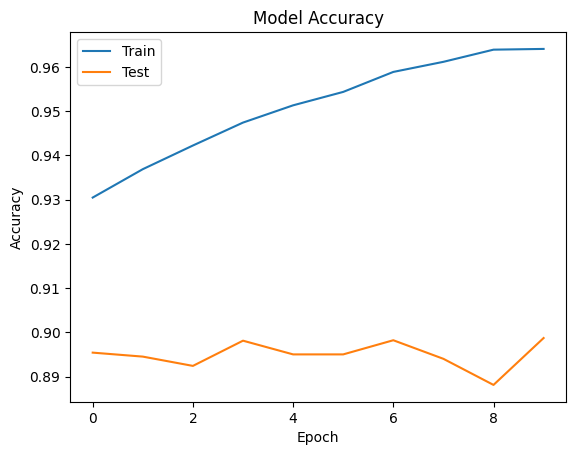

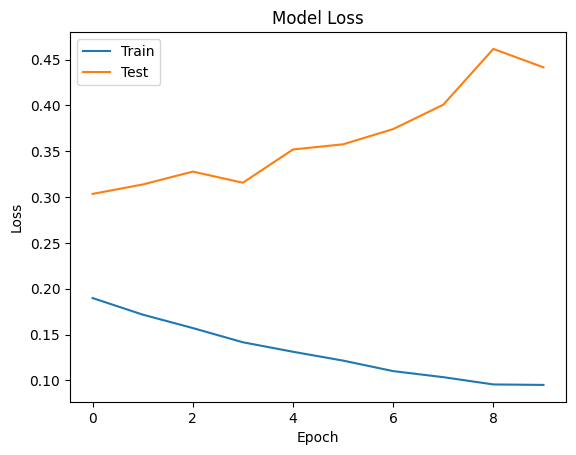

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.save('Trained_fashion_mnist_model.h5')